In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=1.25)
plt.rcParams["figure.figsize"] = [8, 6]

In [55]:
data = pd.read_csv('timings_agg_revision.csv')
categories = pd.read_csv("../../2phase_nsa/categories/job_categories.csv")[["query","well_behaved"]].set_index("query")
data = pd.merge(data, categories, left_on="query", right_index=True)
data

,query,method,total_time,execution_time,hashjoin_time,well_behaved
0,10a,DF-Bin,NaN,1.582985,0.143154,False
112,10a,SYA,NaN,1.560019,0.118454,False
224,10a,DuckDB-Bin,0.988438,0.978643,0.022693,False
371,10a,Umbra-Default,0.157274,0.082926,NaN,False
484,10a,Umbra-L&E,0.178027,0.075839,NaN,False
...,...,...,...,...,...,...
328,7c,DuckDB-Bin,1.339749,1.282085,0.977835,False
362,7c,Umbra-Default,0.219114,0.138920,NaN,False
475,7c,Umbra-L&E,0.236267,0.104496,NaN,False
585,7c,Umbra-Interpreted,0.925736,0.922867,NaN,False


In [56]:
# Create one table for each method
df_bin = data[data["method"] == "DF-Bin"].drop(columns=["method"]).set_index("query")
sya = data[data["method"] == "SYA"].drop(columns=["method"]).set_index("query") 
duckdb_bin = data[data["method"] == "DuckDB-Bin"].drop(columns=["method"]).set_index("query") 
umbra_default = data[data["method"] == "Umbra-Default"].drop(columns=["method"]).set_index("query")
umbra_le = data[data["method"] == "Umbra-L&E"].drop(columns=["method"]).set_index("query")

In [57]:
joinmethod = "outer"
merged = pd.merge(
                pd.merge(
                    pd.merge(
                        pd.merge(duckdb_bin,df_bin, on="query", suffixes=("_duckdbbin", "_dfbin"), how=joinmethod),
                        sya.add_suffix("_sya"), on="query", how=joinmethod
                    ),
                    umbra_default.add_suffix("_umbra_default"), on="query", how=joinmethod
                ), 
                umbra_le.add_suffix("_umbra_le"), on="query", how=joinmethod
            ).drop(columns=["well_behaved_duckdbbin", "well_behaved_dfbin","well_behaved_umbra_default","well_behaved_umbra_le"]).rename(columns={"well_behaved_sya": "well_behaved"})
merged

,total_time_duckdbbin,execution_time_duckdbbin,hashjoin_time_duckdbbin,total_time_dfbin,execution_time_dfbin,hashjoin_time_dfbin,total_time_sya,execution_time_sya,hashjoin_time_sya,well_behaved,total_time_umbra_default,execution_time_umbra_default,hashjoin_time_umbra_default,total_time_umbra_le,execution_time_umbra_le,hashjoin_time_umbra_le
query,,,,,,,,,,,,,,,,
10a,0.988438,0.978643,0.022693,NaN,1.582985,0.143154,NaN,1.560019,0.118454,False,0.157274,0.082926,NaN,0.178027,0.075839,NaN
10b,0.870636,0.861319,0.019508,NaN,1.301113,0.108391,NaN,1.306005,0.111094,False,0.199886,0.132751,NaN,0.228973,0.129110,NaN
10c,1.167226,1.121761,0.180219,NaN,1.499487,0.304208,NaN,1.373513,0.181754,False,0.253744,0.184907,NaN,0.239431,0.126243,NaN
11a,0.122523,0.118126,0.002389,NaN,0.174990,0.011557,NaN,0.175129,0.011804,False,0.105318,0.014951,NaN,0.138184,0.013758,NaN
11b,0.128717,0.123618,0.010953,NaN,0.197555,0.025602,NaN,0.195862,0.023925,False,0.098442,0.014789,NaN,0.141994,0.013672,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9a,1.210967,1.183863,0.088296,NaN,1.619190,0.196013,NaN,1.584936,0.164744,False,0.172762,0.089902,NaN,0.227599,0.101923,NaN
9b,0.793663,0.783606,0.036031,NaN,1.313363,0.099040,NaN,1.340928,0.124798,False,0.187430,0.092030,NaN,0.241028,0.098651,NaN
9c,1.172012,1.131404,0.153628,NaN,1.474649,0.219643,NaN,1.482741,0.224175,False,0.207638,0.118359,NaN,0.239666,0.111999,NaN


In [58]:
def scatterplot(data, x, y, label_col: str|None = None, min=1e-4, max=1e1):
    if label_col is not None:
        ax = sns.scatterplot(data, x=x, y=y, hue=data[label_col],palette={False:"tab:orange", True:"tab:blue"})
    else:
        ax = sns.scatterplot(data, x=x, y=y, color="b")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot([min, max], [min, max], color='grey', linestyle='-', alpha=0.5)
    return ax

def print_speedups(data: pd.DataFrame, x: str, y: str):
    speedups = data[x] / data[y]
    print("Avg. speedup:       {:.3f}x".format(speedups.mean()))
    print("Median speedup:     {:.3f}x".format(speedups.median()))
    abs_speedups = data[x] - data[y]
    print("Avg. abs. speedup:       {:.3f}s".format(abs_speedups.mean()))
    print("Median abs. speedup:     {:.3f}s".format(abs_speedups.median()))
    max_slowdown = (data[y] / data[x]).max()
    max_slowdown_query = data[data[y] / data[x] == max_slowdown].index[0]
    x_time = data.loc[max_slowdown_query, x]
    y_time = data.loc[max_slowdown_query, y]
    print("Max. slowdown:      {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_slowdown, max_slowdown_query, x_time, y_time))

    max_abs_slowdown = (data[y] - data[x]).max()
    max_abs_slowdown_query = data[(data[y] - data[x]) == max_abs_slowdown].index[0]
    x_time = data.loc[max_abs_slowdown_query, x]
    y_time = data.loc[max_abs_slowdown_query, y]
    print("Max. abs. slowdown: {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_slowdown, max_abs_slowdown_query, x_time, y_time))

    max_speedup = (data[x] / data[y]).max()
    max_speedup_query = data[data[x] / data[y] == max_speedup].index[0]
    x_time = data.loc[max_speedup_query, x]
    y_time = data.loc[max_speedup_query, y]
    print("Max. speedup:       {:.3f}x \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_speedup, max_speedup_query, x_time, y_time))

    max_abs_speedup = (data[x] - data[y]).max()
    max_abs_speedup_query = data[(data[x] - data[y]) == max_abs_speedup].index[0]
    x_time = data.loc[max_abs_speedup_query, x]
    y_time = data.loc[max_abs_speedup_query, y]
    print("Max. abs. speedup:  {:.3f}s \t(query {:s}, x={:.3f}s, y={:.3f}s)".format(max_abs_speedup, max_abs_speedup_query, x_time, y_time))
    print("-----------------------------------------------")

def print_stats(ratio_col: pd.Series, epsilon: float = 0.01):
    n_rows = len(ratio_col.dropna())
    n_above = ratio_col[ratio_col > 1+epsilon].shape[0]
    n_below = ratio_col[ratio_col < 1-epsilon].shape[0]
    n_equal = ratio_col[(ratio_col >= 1-epsilon) & (ratio_col <= 1+epsilon)].shape[0]

    print(f"Total: {n_rows}, epsilon: {epsilon}")
    print("Number of dots above the line:", n_above, f"({n_above/n_rows*100:.2f}%)")
    print("Number of dots below the line:", n_below , f"({n_below/n_rows*100:.2f}%)")
    print("Number of dots on the line", n_equal, f"({n_equal/n_rows*100:.2f}%)")

## DuckDB vs DataFusion

In [59]:
x = "hashjoin_time_duckdbbin"
y = "hashjoin_time_dfbin"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
# scatterplot(merged, x, y)
merged[[x,y]].dropna().to_csv("job_jointime_duckdbbin_vs_dfbin.dat", sep=" ", header=True, index=True)

Avg. speedup:       0.661x
Median speedup:     0.502x
Avg. abs. speedup:       -0.016s
Median abs. speedup:     -0.056s
Max. slowdown:      72.323x 	(query 32a, x=0.000s, y=0.017s)
Max. abs. slowdown: 0.630s 	(query 8d, x=1.914s, y=2.544s)
Max. speedup:       2.729x 	(query 9d, x=1.038s, y=0.381s)
Max. abs. speedup:  1.125s 	(query 19d, x=2.115s, y=0.990s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 85 (75.89%)
Number of dots below the line: 26 (23.21%)
Number of dots on the line 1 (0.89%)


In [60]:
x = "execution_time_duckdbbin"
y = "execution_time_dfbin"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
# scatterplot(merged, x, y)
merged[[x,y]].dropna().to_csv("job_executiontime_duckdbbin_vs_dfbin.dat", sep=" ", header=True, index=True)

Avg. speedup:       0.603x
Median speedup:     0.555x
Avg. abs. speedup:       -0.555s
Median abs. speedup:     -0.529s
Max. slowdown:      27.328x 	(query 32a, x=0.005s, y=0.123s)
Max. abs. slowdown: 1.650s 	(query 19b, x=1.123s, y=2.773s)
Max. speedup:       1.603x 	(query 16b, x=2.068s, y=1.290s)
Max. abs. speedup:  0.787s 	(query 19d, x=3.027s, y=2.240s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 103 (91.96%)
Number of dots below the line: 8 (7.14%)
Number of dots on the line 1 (0.89%)


## DF-Bin vs. SYA

Avg. speedup:       1.512x
Median speedup:     1.114x
Avg. abs. speedup:       0.085s
Median abs. speedup:     0.019s
Max. slowdown:      3.272x 	(query 33c, x=0.038s, y=0.123s)
Max. abs. slowdown: 0.085s 	(query 33c, x=0.038s, y=0.123s)
Max. speedup:       13.940x 	(query 11d, x=0.275s, y=0.020s)
Max. abs. speedup:  2.182s 	(query 8c, x=2.839s, y=0.657s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 13 (11.61%)
Number of dots below the line: 96 (85.71%)
Number of dots on the line 3 (2.68%)


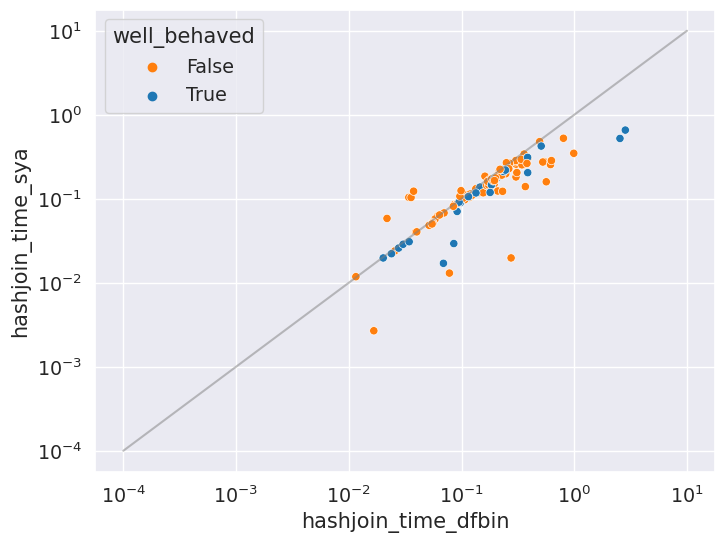

In [61]:
x = "hashjoin_time_dfbin"
y = "hashjoin_time_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")
merged[[x,y,"well_behaved"]].dropna().to_csv("job_jointime_dfbin_vs_sya.dat", sep=" ", header=True, index=True)

Avg. speedup:       1.207x
Median speedup:     1.013x
Avg. abs. speedup:       0.103s
Median abs. speedup:     0.014s
Max. slowdown:      1.312x 	(query 33c, x=0.285s, y=0.374s)
Max. abs. slowdown: 0.089s 	(query 33c, x=0.285s, y=0.374s)
Max. speedup:       6.422x 	(query 32a, x=0.123s, y=0.019s)
Max. abs. speedup:  2.209s 	(query 8c, x=3.352s, y=1.143s)
-----------------------------------------------
Total: 112, epsilon: 0.01
Number of dots above the line: 6 (5.36%)
Number of dots below the line: 59 (52.68%)
Number of dots on the line 47 (41.96%)


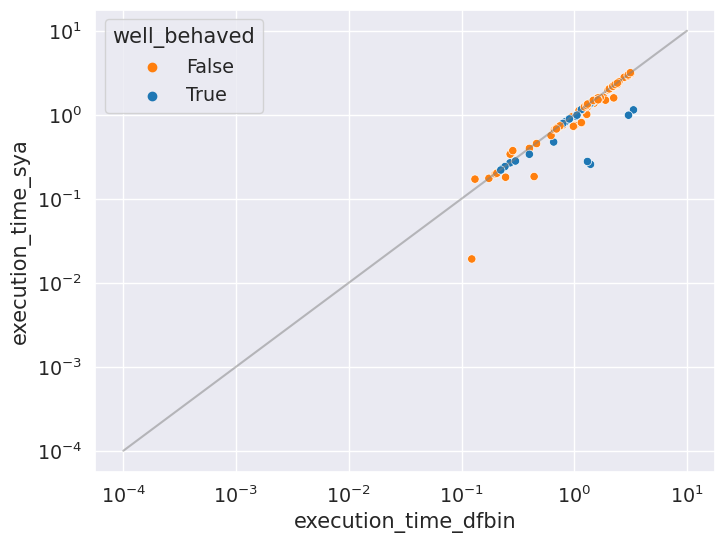

In [62]:
x = "execution_time_dfbin"
y = "execution_time_sya"

print_speedups(merged, x, y)
print_stats(ratio_col = merged[y] / merged[x])
scatterplot(merged, x, y, "well_behaved")
merged[[x,y,"well_behaved"]].dropna().to_csv("job_executiontime_dfbin_vs_sya.dat", sep=" ", header=True, index=True)

In [63]:
x = "execution_time_dfbin"
y = "execution_time_sya"

tmp = merged[merged["well_behaved"] ==  True]
print_speedups(tmp, x, y)
print_stats(ratio_col = tmp[y] / tmp[x])
# scatterplot(tmp, x, y, "well_behaved")

Avg. speedup:       1.469x
Median speedup:     1.014x
Avg. abs. speedup:       0.252s
Median abs. speedup:     0.016s
Max. slowdown:      1.000x 	(query 1c, x=0.231s, y=0.231s)
Max. abs. slowdown: -0.000s 	(query 1c, x=0.231s, y=0.231s)
Max. speedup:       5.428x 	(query 5a, x=1.395s, y=0.257s)
Max. abs. speedup:  2.209s 	(query 8c, x=3.352s, y=1.143s)
-----------------------------------------------
Total: 28, epsilon: 0.01
Number of dots above the line: 0 (0.00%)
Number of dots below the line: 17 (60.71%)
Number of dots on the line 11 (39.29%)


In [64]:
x = "execution_time_dfbin"
y = "execution_time_sya"

tmp = merged[merged["well_behaved"] ==  False]
print_speedups(tmp, x, y)
print_stats(ratio_col = tmp[y] / tmp[x])
# scatterplot(tmp, x, y, "well_behaved")

Avg. speedup:       1.120x
Median speedup:     1.010x
Avg. abs. speedup:       0.053s
Median abs. speedup:     0.012s
Max. slowdown:      1.312x 	(query 33c, x=0.285s, y=0.374s)
Max. abs. slowdown: 0.089s 	(query 33c, x=0.285s, y=0.374s)
Max. speedup:       6.422x 	(query 32a, x=0.123s, y=0.019s)
Max. abs. speedup:  0.652s 	(query 19d, x=2.240s, y=1.588s)
-----------------------------------------------
Total: 84, epsilon: 0.01
Number of dots above the line: 6 (7.14%)
Number of dots below the line: 42 (50.00%)
Number of dots on the line 36 (42.86%)


# Umbra-L&E speedup


In [65]:
# inner join all methods
# (only consider queries that are run by all methods)
tmp = pd.merge(
    pd.merge(
    pd.merge(sya, df_bin, on="query", suffixes=("_sya", "_dfbin"), how="inner"),
    umbra_le.add_suffix("_umbra_le"), on="query", how="inner"
),
umbra_default.add_suffix("_umbra_default"), on="query", how="inner"
).rename(columns={"well_behaved_sya": "well_behaved"})

x = "execution_time_umbra_default"
y = "execution_time_umbra_le"

print_speedups(tmp, x, y)

Avg. speedup:       1.077x
Median speedup:     1.029x
Avg. abs. speedup:       0.010s
Median abs. speedup:     0.001s
Max. slowdown:      1.293x 	(query 30b, x=0.127s, y=0.164s)
Max. abs. slowdown: 0.037s 	(query 30b, x=0.127s, y=0.164s)
Max. speedup:       1.852x 	(query 17e, x=0.379s, y=0.205s)
Max. abs. speedup:  0.213s 	(query 16b, x=0.508s, y=0.295s)
-----------------------------------------------
